# LGM INTERNSHIP
# TASK -2 (Stock Market Prediction And Forecasting Using Stacked LSTM)

## Implementation Steps

## Import Libraries

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

## Load Data

In [2]:
df=pd.read_csv('Amazon.csv')

In [3]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1997-12-31,5.041667,4.843750,4.875000,5.020833,4446000.0,5.020833
1,1998-01-02,5.000000,4.796875,5.000000,4.958333,1660800.0,4.958333
2,1998-01-05,4.937500,4.708333,4.885417,4.750000,3590400.0,4.750000
3,1998-01-06,4.875000,4.666667,4.697917,4.838542,4174800.0,4.838542
4,1998-01-07,4.833333,4.692708,4.833333,4.781250,2725200.0,4.781250


In [7]:
df = pd.read_csv('Amazon.csv')
df.set_index('Date', inplace=True)  # Set the date to be the index
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')  # Convert index to datetime format

In [8]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-12-31,5.041667,4.843750,4.875000,5.020833,4446000.0,5.020833
1998-01-02,5.000000,4.796875,5.000000,4.958333,1660800.0,4.958333
1998-01-05,4.937500,4.708333,4.885417,4.750000,3590400.0,4.750000
1998-01-06,4.875000,4.666667,4.697917,4.838542,4174800.0,4.838542
1998-01-07,4.833333,4.692708,4.833333,4.781250,2725200.0,4.781250


## Preprocess the data

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

## Split Data 

In [ ]:
# Split the data into training and validation sets
train_len = int(0.8 * len(scaled_data))
train_Ama = scaled_data[:train_len]
valid_Ama = scaled_data[train_len:]

In [20]:
# Prepare the training data
train_X, train_y = [], []
for i in range(2, len(train_Ama)):
    train_X.append(train_Ama[i-2:i])
    train_y.append(train_Ama[i])
train_X, train_y = np.array(train_X), np.array(train_y)
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))

# Prepare the validation data
valid_X, valid_y = [], []
for i in range(2, len(valid_Ama)):
    valid_X.append(valid_Ama[i-2:i])
    valid_y.append(valid_Ama[i])
valid_X, valid_y = np.array(valid_X), np.array(valid_y)
valid_X = np.reshape(valid_X, (valid_X.shape[0], valid_X.shape[1], 1))

## Build LSTM Model

In [21]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(2, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

## Train Data

In [34]:
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(valid_X, valid_y))

Epoch 1/50
153/153 [==============================] - 2s 11ms/step - loss: 3.1794e-06 - val_loss: 78988894535680.0000
Epoch 2/50
153/153 [==============================] - 2s 11ms/step - loss: 3.6201e-06 - val_loss: 78988894535680.0000
Epoch 3/50
153/153 [==============================] - 2s 11ms/step - loss: 3.4319e-06 - val_loss: 78988894535680.0000
Epoch 4/50
153/153 [==============================] - 2s 10ms/step - loss: 3.3426e-06 - val_loss: 78988894535680.0000
Epoch 5/50
153/153 [==============================] - 2s 10ms/step - loss: 4.4814e-06 - val_loss: 78988894535680.0000
Epoch 6/50
153/153 [==============================] - 2s 11ms/step - loss: 3.3479e-06 - val_loss: 78988894535680.0000
Epoch 7/50
153/153 [==============================] - 2s 11ms/step - loss: 3.4589e-06 - val_loss: 78988894535680.0000
Epoch 8/50
153/153 [==============================] - 2s 11ms/step - loss: 4.0723e-06 - val_loss: 78988894535680.0000
Epoch 9/50
153/153 [==============================] - 2s

## Visualization of Data

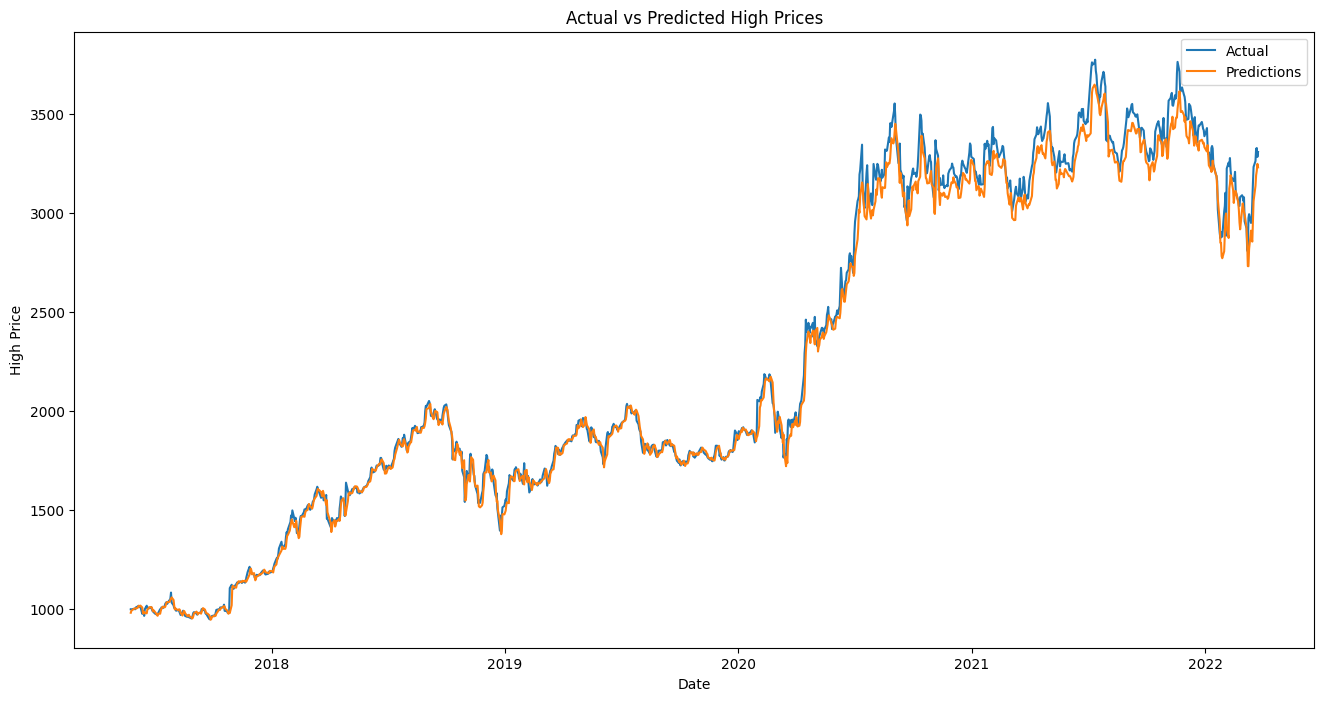

In [25]:
# Plot the actual and predicted values
plt.figure(figsize=(16, 8))
plt.plot(valid_df.index, valid_df['High'], label='Actual')
plt.plot(valid_df.index, valid_df['Predictions'], label='Predictions')
plt.title('Actual vs Predicted High Prices')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()
plt.show()

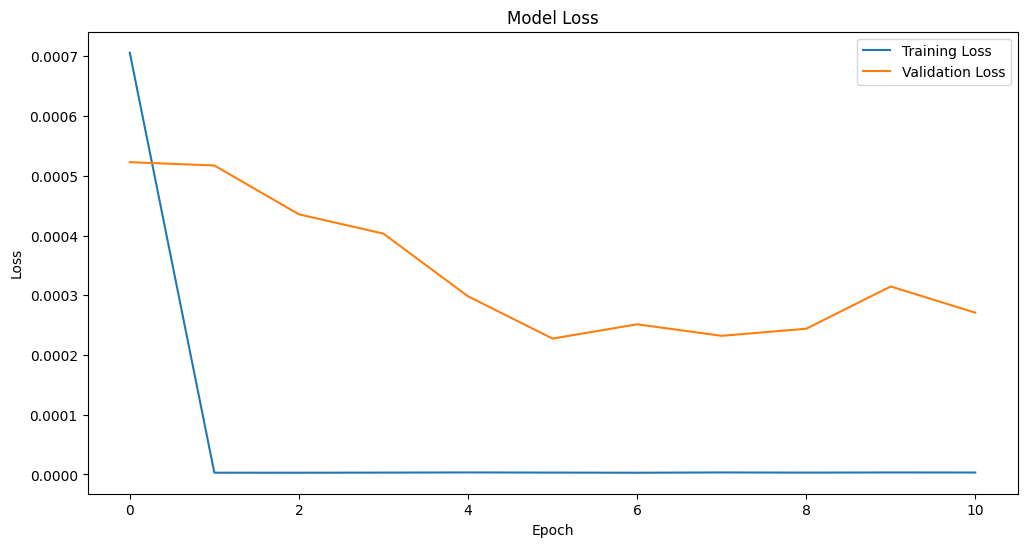

In [26]:
# Plot the training and validation loss curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

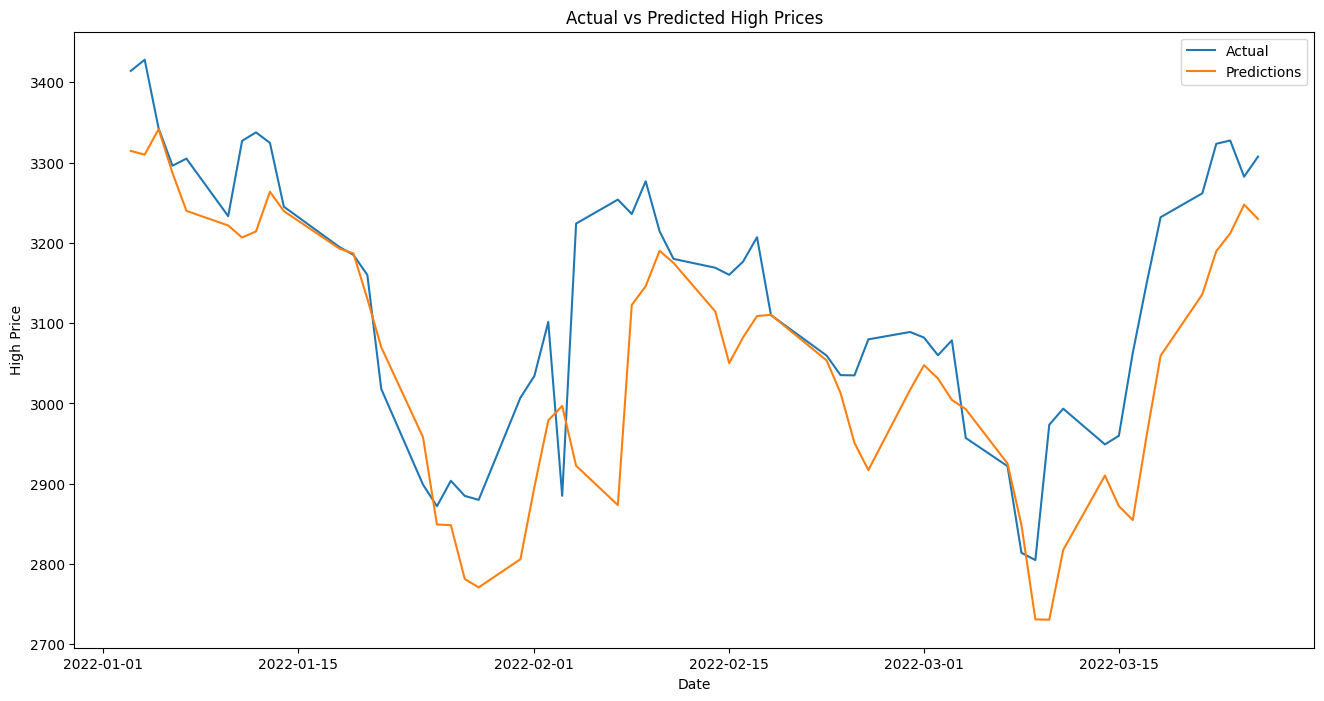

In [27]:
# Plot the actual and predicted values for a specific range
start_date = '2022-01-01'
end_date = '2022-06-30'
plt.figure(figsize=(16, 8))
plt.plot(valid_df.loc[start_date:end_date, 'High'], label='Actual')
plt.plot(valid_df.loc[start_date:end_date, 'Predictions'], label='Predictions')
plt.title('Actual vs Predicted High Prices')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()
plt.show()

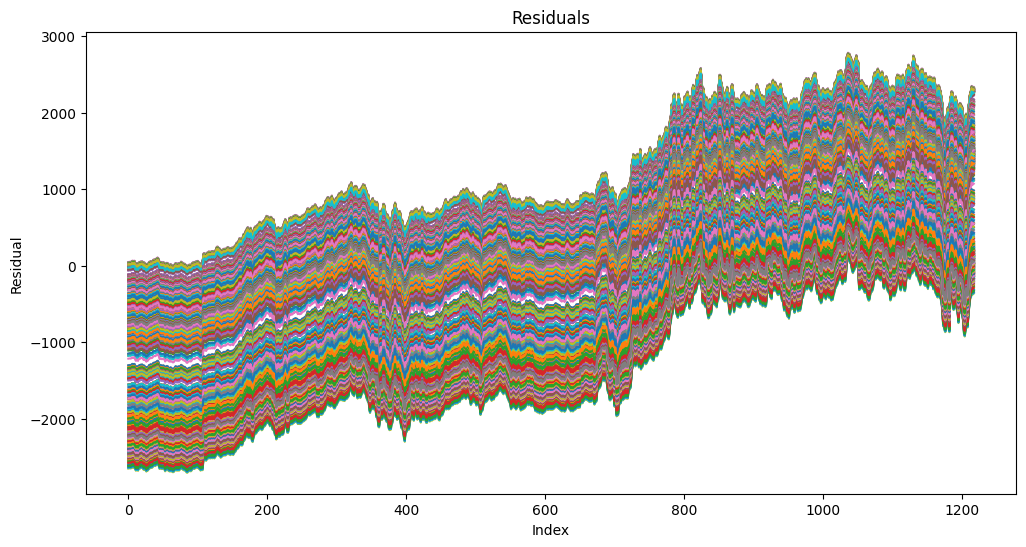

In [28]:
# Plot the residuals
residuals = valid_y - valid_pred.flatten()
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.show()

## Evaluation

In [30]:
# Make predictions on the validation data
valid_pred = model.predict(valid_X)

# Inverse transform the predictions and actual values to their original scales
valid_pred = scaler.inverse_transform(valid_pred)
valid_y = scaler.inverse_transform(valid_y)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(valid_y, valid_pred))
print('Validation RMSE:', rmse)

39/39 [==============================] - 0s 5ms/step
Validation RMSE: 8885239.685151927


In [31]:
# Calculate the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(valid_y, valid_pred) * 100
print('Validation MAPE:', mape)

# Create a DataFrame for visualization
valid_df = pd.DataFrame(df['High'].iloc[train_len+2:])
valid_df['Predictions'] = valid_pred

Validation MAPE: 99.97356767457912


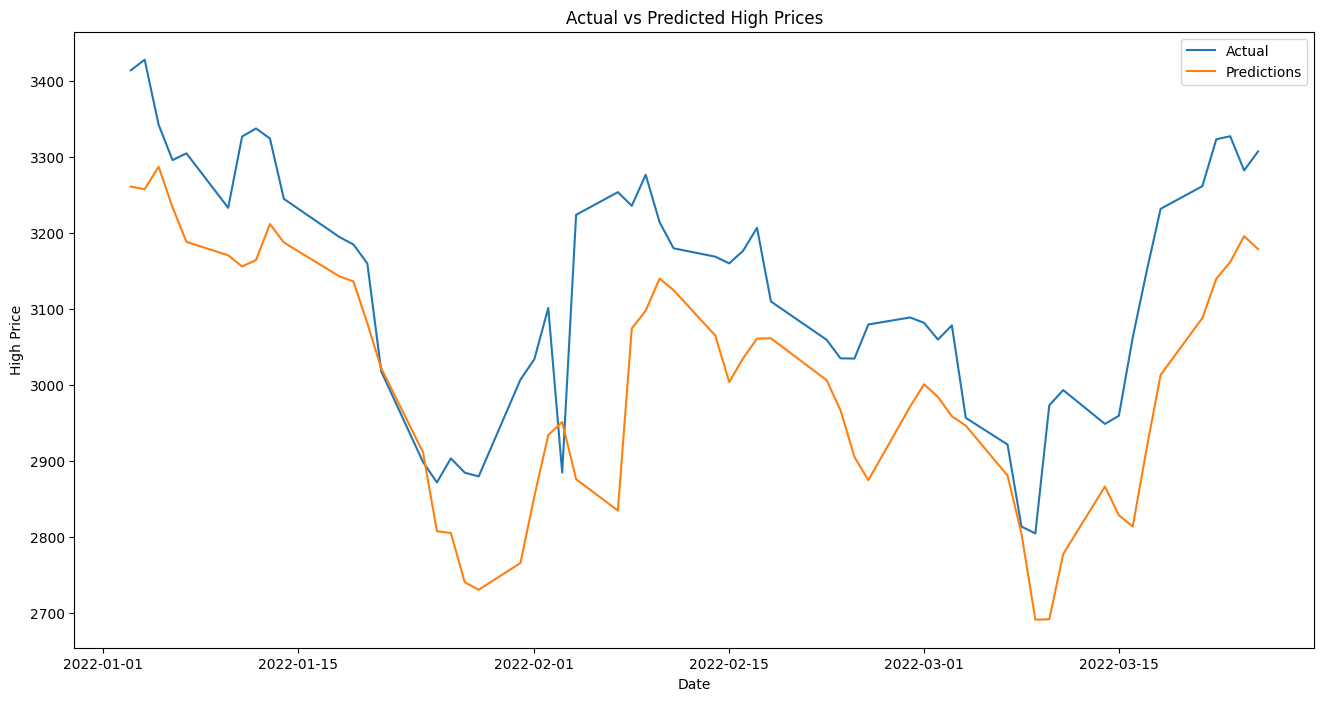

In [33]:
start_date = '2022-01-01'
end_date = '2022-06-30'
plt.figure(figsize=(16, 8))
plt.plot(df.loc[start_date:end_date, 'High'], label='Actual')
plt.plot(valid_df.loc[start_date:end_date, 'Predictions'], label='Predictions')
plt.title('Actual vs Predicted High Prices')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()
plt.show()